In this linear regression model, i will use the dataset I found from [kaggle](https://www.kaggle.com/datasets/juhibhojani/road-accidents-data-2022)

In [69]:
# first i need to mount drive to access the csv file
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv")
data.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [71]:
df = pd.DataFrame(data)
for columns in df.columns:
  print(columns)

status
accident_index
accident_year
accident_reference
vehicle_reference
casualty_reference
casualty_class
sex_of_casualty
age_of_casualty
age_band_of_casualty
casualty_severity
pedestrian_location
pedestrian_movement
car_passenger
bus_or_coach_passenger
pedestrian_road_maintenance_worker
casualty_type
casualty_home_area_type
casualty_imd_decile
lsoa_of_casualty


In [72]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

*From the above results, there are no null values*

In [73]:
df.casualty_severity

0        3
1        3
2        3
3        3
4        3
        ..
61347    3
61348    2
61349    3
61350    3
61351    3
Name: casualty_severity, Length: 61352, dtype: int64

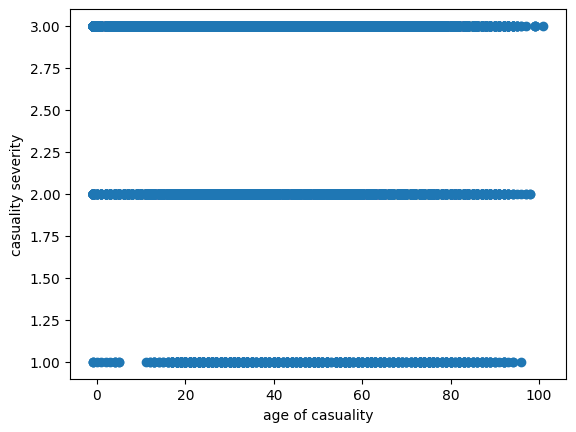

In [74]:
import matplotlib.pyplot as plt

x = df['age_of_casualty']
y = df['casualty_severity']

plt.scatter(x, y)
plt.xlabel("age of casuality")
plt.ylabel("casuality severity")
plt.show()

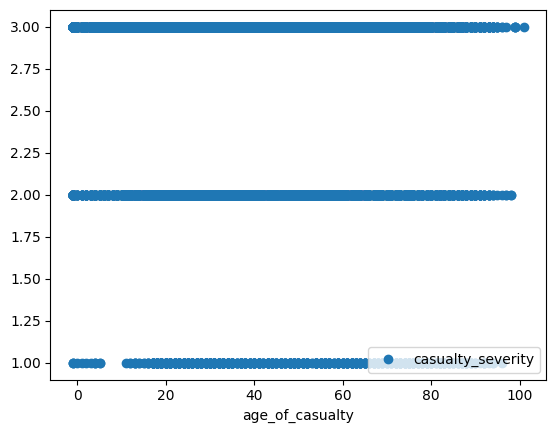

In [75]:
data.plot(x="age_of_casualty", y="casualty_severity", style='o')
plt.show()

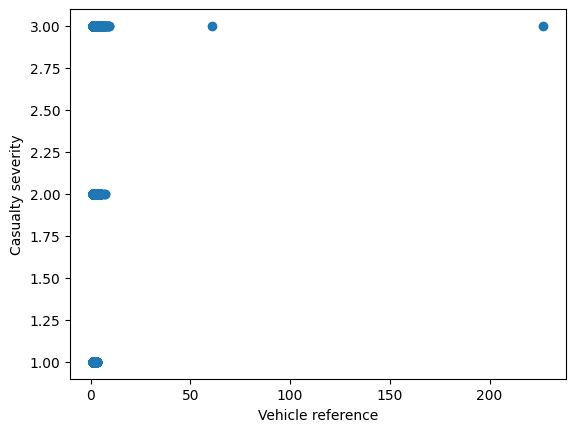

In [76]:
import matplotlib.pyplot as plt

x = df['vehicle_reference']
y = df['casualty_severity']

plt.scatter(x, y)
plt.xlabel("Vehicle reference")
plt.ylabel("Casualty severity")
plt.show()

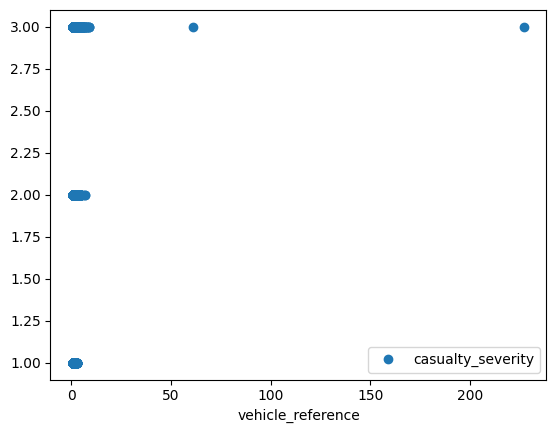

In [77]:
data.plot(x="vehicle_reference", y="casualty_severity", style='o')
plt.show()

**using the above independent variables(age and vehicle reference) and dependent variable(casualty severity), now we can use the machine learning multilinear regression model from scikit learn to compute the prediction of the casuality severity**

In [78]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = df[['age_of_casualty', 'vehicle_reference']]
Y = df['casualty_severity']

reg.fit(X, Y)


LinearRegression()

In [79]:
#view the coefficient
reg.coef_

array([-0.00206461,  0.01786974])

In [80]:
#view the intercept
reg.intercept_

2.8328309428277896

In [81]:
#view the model score
reg.score(X, Y)

0.010142340600973188

***Now it is time to predict some data***

In [86]:
prediction_data = pd.DataFrame({
    'age_of_casualty': [28],
    'vehicle_reference': [4]
})

reg.predict(prediction_data)

array([2.8465009])


`**provided 28 years old person and 4 vehicles involved, the casualities may be 2.8465009**`

In [89]:
prediction_data2 = pd.DataFrame({
    'age_of_casualty': [76],
    'vehicle_reference': [2]
})

reg.predict(prediction_data2)

array([2.71166028])